In [ ]:
# нужно примержить все нужные данные
# подсмотреть идеи на фича инжиниринг
# можно просто заэнкодить все буквенные переменные
# попробовать в качестве предсказаний (идеи):
#   1 косинусное(евклидово) расстояние
#   2 посмотреть model zoo какие-нибудь сетки для рекомендаций и даже чем бог не шутить разобраться с файн-тюнингом сети
#   3 просто украсть у индусов их деревья с акураси 75 (шутка)
#   4 бустинг деревьев

In [1]:
!pip install catboost

  Using cached catboost-1.2.3-cp311-cp311-win_amd64.whl (101.1 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Python311\\etc'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from service_func.service_func import *
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn import metrics

## Загрузка данных

In [4]:
train_data = pd.read_csv('data/processed/train_preprocessed_and_scaled.csv')
#test_data = pd.read_csv('test_preprocessed.csv')

In [5]:
train_data = remove_funtion(train_data)
# удаляем эти признаки из-за их низкого feature importance 
drop_list  = ['country_code ', 'composer_count' , 'one_genre' ,'expire_month' ,'city' , 'regi_day' , 'age_gap_between_song']

train_data = train_data.drop(drop_list,axis = 1)

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
train_data.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,bd,gender,registered_via,registration_init_time,expiration_date,regi_month,regi_year,expire_day,expire_year,imputed_bd,song_length,language,name,two_genre,three_genre,four_genre,five_genre,six_genre,seven_genre,eight_genre,binary_song_length,like_language,lyricist_count,composer_first_name,first_artist_name,regi_code,year,designation_code,member_song_count,artist_song_count,lang_song_count,song_member_count,age_song_count
0,3471,18027,3,7,4,1,0.173495,0,3,20110525,20170911,4,24,4,10,24.0,0.605766,8.0,6186,0,0,0,0,0,0,0,0,1,0,5492,3700,74,84,3774,0.061554,3.669281,-0.629961,-0.628301,-0.74296
1,3471,9744,3,7,4,1,0.173495,0,3,20110525,20170911,4,24,4,10,24.0,-0.308733,8.0,4359,0,0,0,0,0,0,0,1,1,0,3654,2511,1325,6,5831,0.061554,-0.583888,-0.629961,-0.627445,-0.74296


## Train test split

In [14]:
'''
X = train_data[:1000000].drop(['target'], axis = 1)
y = train_data[:1000000]['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # потому что данных в трейне и так очень много, настолько что мне не хватает оперативки для их обработки на моем компьютере
'''

''

In [6]:
train_data = train_data.sample(frac = 1)

In [7]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,bd,gender,registered_via,registration_init_time,expiration_date,regi_month,regi_year,expire_day,expire_year,imputed_bd,song_length,language,name,two_genre,three_genre,four_genre,five_genre,six_genre,seven_genre,eight_genre,binary_song_length,like_language,lyricist_count,composer_first_name,first_artist_name,regi_code,year,designation_code,member_song_count,artist_song_count,lang_song_count,song_member_count,age_song_count
292590,286,10516,0,10,5,0,-0.346125,1,0,20150619,20170611,5,18,3,10,18.0,0.259360,1.0,22153,0,0,0,0,0,0,0,0,1,1,5944,4255,241,16,1307,-0.578680,-0.124274,0.846387,1.371090,-0.841659
137696,2390,23882,3,7,3,1,0.952926,1,2,20130912,20170919,8,11,4,18,32.0,0.830884,1.0,18342,0,0,0,0,0,0,0,0,1,0,5431,5317,0,0,0,0.667981,-0.389091,0.846387,-0.530645,-0.827309
4495489,5595,30112,0,10,5,0,0.086892,1,0,20121112,20170921,10,11,6,20,23.0,-0.900621,8.0,230,0,0,0,0,0,0,0,1,1,3,4145,1249,619,15,366,-0.046208,-0.569948,-0.629961,-0.612882,-0.765496
4435296,1666,16040,0,3,8,1,1.126133,1,0,20120928,20180623,8,27,7,22,35.0,-0.714501,5.0,4532,0,0,0,0,0,0,0,1,0,0,2335,1578,264,16,9002,-0.318783,-0.527843,-1.461677,-0.441126,-0.854987
1158513,6991,18124,0,0,0,0,-0.952349,2,1,20161114,20170807,10,13,6,6,19.5,2.503444,0.0,1072,26,0,0,0,0,0,0,0,0,0,6340,789,738,65,122,1.044092,-0.568497,-1.686004,-0.621877,1.238488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909004,7870,3756,3,7,4,1,-1.038953,2,2,20131112,20170910,10,11,8,9,26.3,1.168297,1.0,26531,0,0,0,0,0,0,0,0,1,1,5363,6449,534,14,2726,-0.990713,-0.582419,0.846387,-0.596177,1.238488
1334849,4639,12050,5,12,6,1,0.779720,1,0,20140130,20170718,0,29,6,17,27.0,0.662980,1.0,17947,0,0,0,0,0,0,0,0,1,0,5704,4289,251,5,12148,0.672207,-0.473338,0.846387,-0.621877,-0.749532
2269279,7511,26691,5,13,6,1,-1.038953,2,3,20141211,20171004,11,10,7,3,28.3,-0.291166,8.0,10505,0,0,0,0,0,0,0,1,1,0,2248,3098,375,12,110,2.977474,-0.574947,-0.629961,-0.614595,1.238488
4378806,4236,25109,3,7,3,1,2.078771,0,3,20160930,20170402,8,29,5,1,46.0,-0.278094,7.0,5716,0,0,0,0,0,0,0,1,1,5,1053,2910,936,11,5306,-0.428659,-0.430247,-0.629961,-0.620592,-0.914769


In [7]:
X = train_data.drop(['target'], axis = 1).values
y = train_data['target'].values

X_train, X_valid, X_test = X[:3500000], X[3500000:4000000], X[4000000:5000000]
y_train, y_valid, y_test = y[:3500000], y[3500000:4000000], y[4000000:5000000]

In [50]:
def evaluate(model, X_test, y_test, model_name, k, use_proba=True):
    if use_proba == True:
        y_pred = model.predict_proba(X_test)[:, 1]
    elif use_proba == False:
        y_pred =  model.predict(X_test)
    ndcg = metrics.ndcg_score(y_test.reshape(1, -1), y_pred.reshape(1, -1), k=k)
    print(f'NDCG@{k} на тестовых данных c использованием {model_name}: {ndcg}')
    #print(f'Предсказания: {y_pred}')
    #print(f'Истинные значения: {y_test}')

## Обучение моделей
### **Catboost**

Да, можно было использовать возможности catboost для обработки категориальных фичей, но мы обработали сами, и пожалуй, в этот раз не посмотрим, что может библиотека по части категориальных признаков.

**Во всех случаях ниже, выбор loss-функции был обусловлен:**
- тем, подходит ли она под задачу бинарной классификации (информацию о eval-метриках и loss-функциях брал с сайтов документации по xgb и catboost);
- далее почти вручную (без grid search'а) примерно подбирая лосс, при котором предсказания получаются лучше.

In [17]:
#from sklearn.model_selection import GridSearchCV

#cv_params = {'iterations': [500,600,700,800]}
params = {
    'iterations': 150,
    'learning_rate':0.9,
    #'l2_leaf_reg':3, 'bagging_temperature':1, 'random_strength':1, 'depth':6,
    #'rsm':1, 'one_hot_max_size':2, 'leaf_estimation_method':'Gradient',
    #'fold_len_multiplier':2, 'border_count':128, 'eval_metric': 'AUC', #'NDCG' 
}

model_cb = CatBoostClassifier(**params)
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model_cb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

#optimized_cb = GridSearchCV(estimator=model_cb, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=2)
#optimized_cb.fit(X,y,cat_features =category_features)
#print(The best value of 'parameters: {0}'.format(optimized_cb.best_params_))

0:	learn: 0.6261554	test: 0.6261992	test1: 0.6263833	best: 0.6263833 (0)	total: 498ms	remaining: 1m 14s
1:	learn: 0.6173075	test: 0.6172497	test1: 0.6173846	best: 0.6173846 (1)	total: 1.04s	remaining: 1m 17s
2:	learn: 0.6142431	test: 0.6142286	test1: 0.6145409	best: 0.6145409 (2)	total: 1.55s	remaining: 1m 15s
3:	learn: 0.6125619	test: 0.6125891	test1: 0.6129585	best: 0.6129585 (3)	total: 1.96s	remaining: 1m 11s
4:	learn: 0.6112485	test: 0.6112779	test1: 0.6117645	best: 0.6117645 (4)	total: 2.39s	remaining: 1m 9s
5:	learn: 0.6100641	test: 0.6100785	test1: 0.6106434	best: 0.6106434 (5)	total: 2.79s	remaining: 1m 7s
6:	learn: 0.6091661	test: 0.6091803	test1: 0.6096970	best: 0.6096970 (6)	total: 3.13s	remaining: 1m 3s
7:	learn: 0.6085567	test: 0.6085761	test1: 0.6091719	best: 0.6091719 (7)	total: 3.49s	remaining: 1m 2s
8:	learn: 0.6079162	test: 0.6079309	test1: 0.6085196	best: 0.6085196 (8)	total: 3.86s	remaining: 1m
9:	learn: 0.6074454	test: 0.6074654	test1: 0.6080237	best: 0.6080237 (9)

In [30]:
preds_class = model_cb.predict(X_test)
metrics.accuracy_score(preds_class, y_test)

0.691298

In [51]:
evaluate(model_cb, X_test, y_test, 'CatBoostClassifier', 20, use_proba=True)

NDCG@20 на тестовых данных c использованием CatBoostClassifier: 1.0


In [52]:
evaluate(model_cb, X_test, y_test, 'CatBoostClassifier', 20, use_proba=False)

NDCG@20 на тестовых данных c использованием CatBoostClassifier: 0.6981619443696456


Если использовать predict_proba (вероятность), то метрика получается слишком хорошая, скорее вскего эта оценка не адекватна, пока не очень понимаю, с чем это связано. Поэтому будем использовать версию метрики без proba.

### **XGBoost**

In [45]:
params_xgboost = {
    'objective': 'binary:logistic', #'binary:hinge',
    'eta': 0.1,
    'max_depth': 10,
    #'silent': 1,
    'eval_metric': 'auc', #'error',  #mean_squared_error, 
    'early_stopping_rounds': 10,
    'learning_rate': 0.2,
    #max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
    'n_estimators': 500,
    #'num_boost_round': 100,
}

model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.set_params(**params_xgboost)
eval_set = [(X_train, y_train), (X_valid, y_valid)]
#eval_set = [(X_valid, y_valid)]

model_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.72686	validation_1-auc:0.72382
[1]	validation_0-auc:0.73066	validation_1-auc:0.72728
[2]	validation_0-auc:0.73313	validation_1-auc:0.72939
[3]	validation_0-auc:0.73503	validation_1-auc:0.73116
[4]	validation_0-auc:0.73645	validation_1-auc:0.73238
[5]	validation_0-auc:0.73789	validation_1-auc:0.73351
[6]	validation_0-auc:0.73922	validation_1-auc:0.73464
[7]	validation_0-auc:0.74050	validation_1-auc:0.73563
[8]	validation_0-auc:0.74203	validation_1-auc:0.73682
[9]	validation_0-auc:0.74343	validation_1-auc:0.73804
[10]	validation_0-auc:0.74539	validation_1-auc:0.73976
[11]	validation_0-auc:0.74705	validation_1-auc:0.74119
[12]	validation_0-auc:0.74822	validation_1-auc:0.74212
[13]	validation_0-auc:0.75041	validation_1-auc:0.74400
[14]	validation_0-auc:0.75205	validation_1-auc:0.74537
[15]	validation_0-auc:0.75348	validation_1-auc:0.74659
[16]	validation_0-auc:0.75493	validation_1-auc:0.74782
[17]	validation_0-auc:0.75607	validation_1-auc:0.74862
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eta=0.1, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
preds_class = model_xgb.predict(X_test)
metrics.accuracy_score(preds_class, y_test)

0.762486

In [63]:
evaluate(model_xgb, X_test, y_test, 'XGBClassifier', 20, use_proba=True)

NDCG@20 на тестовых данных c использованием XGBClassifier: 1.0


In [53]:
evaluate(model_xgb, X_test, y_test, 'XGBClassifier', 20, use_proba=False)

NDCG@20 на тестовых данных c использованием XGBClassifier: 0.7695093120340937


**Значение метрики NDCG@20 = 0.7695093120340937, полученное с помощью XGBClassifier, будем считать нашим лучшим результатом**

## Выводы:

Мне немного трудно оценить, насколько хорош результат, тк я что-то не нашел бейзлайнов по этой задаче (может плохо искал). Для более мощного результата нужно было, предполагаю, пользоваться deep learning методами, или трансформерами. Но этот результат - уже неплохо.

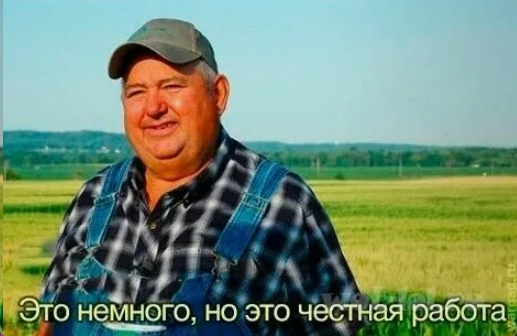

## Рекомендации с помощью косинусного сходства или евклидова расстояния до других треков (не доделано)

In [ ]:
def recommend(track_id, ref_df, sp, n_recs = 5):
    
    # Crawl valence and arousal of given track from spotify api
    track_features = sp.track_audio_features(track_id)
    track_moodvec = np.array([track_features.valence, track_features.energy])
    
    # Compute distances to all reference tracks
    ref_df["distances"] = ref_df["mood_vec"].apply(lambda x: norm(track_moodvec-np.array(x)))
    # Sort distances from lowest to highest
    ref_df_sorted = ref_df.sort_values(by = "distances", ascending = True)
    # If the input track is in the reference set, it will have a distance of 0, but should not be recommendet
    ref_df_sorted = ref_df_sorted[ref_df_sorted["id"] != track_id]
    
    # Return n recommendations
    return ref_df_sorted.iloc[:n_recs]